In [2]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

from laboneq.dsl.quantum import QPU
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon
from helpers.sqil_transmon.operations import SqilTransmonOperations

from laboneq_applications.experiments.options import (
    ResonatorSpectroscopyExperimentOptions,
)
from laboneq_applications.core import validation
from laboneq.dsl.enums import AcquisitionType
from laboneq.simple import Experiment, SweepParameter, dsl

from laboneq.dsl.quantum.quantum_element import QuantumElement
from numpy.typing import ArrayLike

%matplotlib inline

In [3]:
params = {
    "readout_lo_frequency": 7.2e9,
    "drive_lo_frequency": 5e9,
    "ext_lo": 11e9
}

### Resonator spectroscopy

2025-06-12 08:21:41,607 - INFO - Successfully connected to zi


c:\Users\sqil\Desktop\code\sqil-experiments\measurements\setup/setup_test.py:53: FutureWarning: Deprecated option `query_zsync` provided, which is no longer functional - ZSync information is queried from instruments by default.
  return generate_device_setup(


[2025.06.12 08:21:41.619] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.06.12 08:21:41.620] INFO    VERSION: laboneq 2.53.0
[2025.06.12 08:21:41.621] INFO    Connecting to data server at localhost:8004
[2025.06.12 08:21:41.624] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.06.12 08:21:41.632] INFO    Configuring the device setup
[2025.06.12 08:21:41.640] INFO    The device setup is configured


2025-06-12 08:21:41,642 - INFO - Turning on local oscillators before experiment


[2025.06.12 08:21:41.653] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.06.12 08:21:41.654] INFO    Starting LabOne Q Compiler run...
[2025.06.12 08:21:41.678] INFO    Schedule completed. [0.026 s]
[2025.06.12 08:21:41.707] INFO    Code generation completed for all AWGs. [0.033 s]
[2025.06.12 08:21:41.707] INFO    Completed compilation step 1 of 1. [0.061 s]
[2025.06.12 08:21:41.707] INFO     ──────────────────────────────────────────────────────────────── 
[2025.06.12 08:21:41.707] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.06.12 08:21:41.707] INFO     ──────────────────────────────────────────────────────────────── 
[2025.06.12 08:21:41.707] INFO      shfqc_0        0         21            0           1      8000  
[2025.06.12 08:21:41.722] INFO      shfqc_0_sg     0          9            1           0         0  
[2025.06.12 08:21:41.723] INFO     ─────────────────────────────────────────

2025-06-12 08:21:42,307 - INFO - Turning off local oscillators after experiment


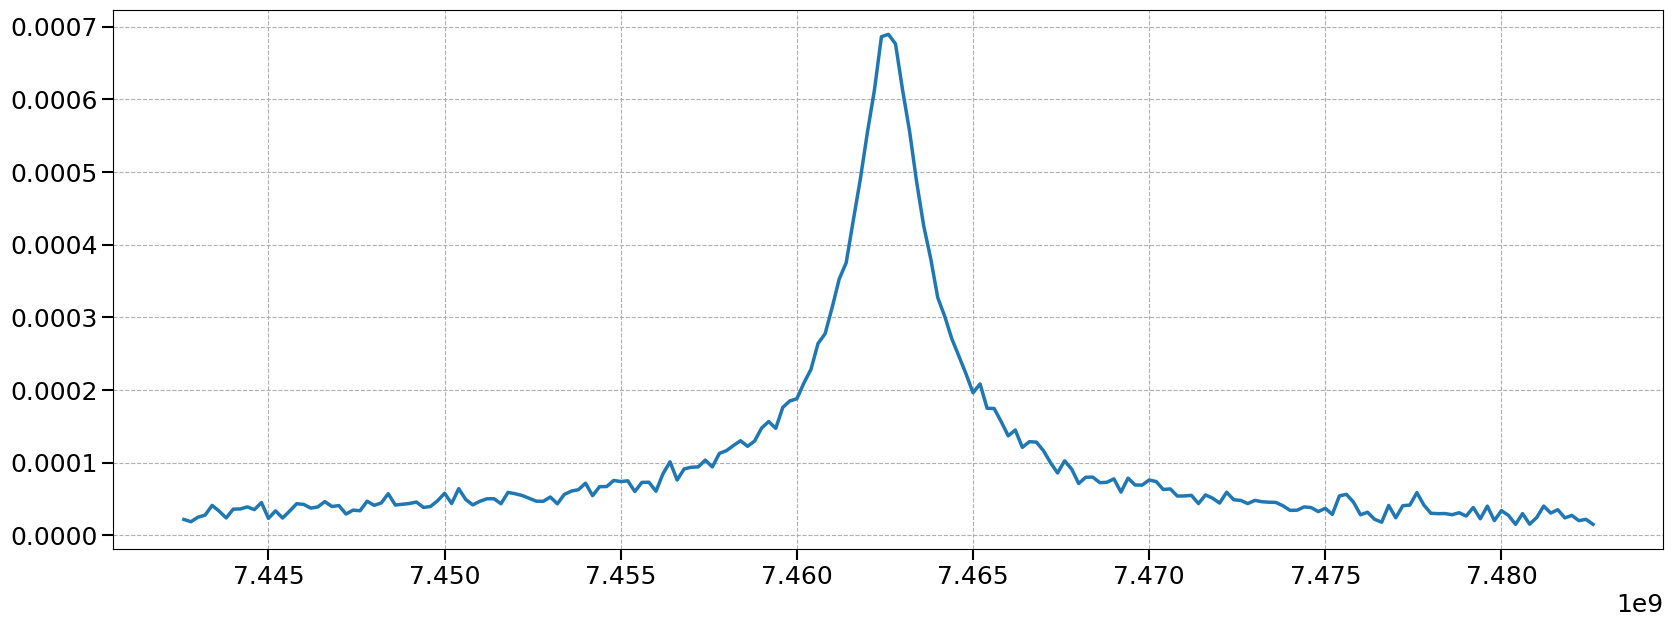

In [4]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

ro_freq = 7.4626e9

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 200

result = rr_spec.run(
    np.linspace(ro_freq - 20e6, ro_freq + 20e6, 201),
    # sweeps={"readout_range_out": [-30, -20], "readout_amplitude": [0.5, 1]},
    # sweeps={"ro_power": np.linspace(-40, 0, 11)},
    options=options
)

### Qubit specroscopy

In [ ]:
import numpy as np
from qu_spec import QuSpec, QuSpecOptions
from laboneq.dsl.enums import AveragingMode

qu_freq = 5.3748e9

qu_spec = QuSpec()
options = QuSpecOptions()
options.count = 1000
options.averaging_mode = AveragingMode.CYCLIC

result = qu_spec.run(
    np.linspace(qu_freq - 40e6, qu_freq + 40e6, 401),
    # sweeps={"spectroscopy_amplitude": np.linspace(0,1,5)},
    options=options,
)

2025-06-12 12:04:05,866 - INFO - Successfully connected to zi
c:\Users\sqil\Desktop\code\sqil-experiments\measurements\setup/setup_test.py:53: FutureWarning: Deprecated option `query_zsync` provided, which is no longer functional - ZSync information is queried from instruments by default.
  return generate_device_setup(


[2025.06.12 12:04:05.878] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.06.12 12:04:05.879] INFO    VERSION: laboneq 2.53.0
[2025.06.12 12:04:05.882] INFO    Connecting to data server at localhost:8004
[2025.06.12 12:04:05.883] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.06.12 12:04:05.883] INFO    Configuring the device setup
[2025.06.12 12:04:05.900] INFO    The device setup is configured


2025-06-12 12:04:05,900 - INFO - Turning on local oscillators before experiment


[2025.06.12 12:04:05.916] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.06.12 12:04:05.916] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/measure' to HARDWARE
[2025.06.12 12:04:05.917] INFO    Starting LabOne Q Compiler run...
[2025.06.12 12:04:06.066] INFO    Schedule completed. [0.147 s]
[2025.06.12 12:04:06.215] INFO    Code generation completed for all AWGs. [0.156 s]
[2025.06.12 12:04:06.215] INFO    Completed compilation step 1 of 1. [0.305 s]
[2025.06.12 12:04:06.215] INFO     ──────────────────────────────────────────────────────────────── 
[2025.06.12 12:04:06.215] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.06.12 12:04:06.215] INFO     ──────────────────────────────────────────────────────────────── 
[2025.06.12 12:04:06.215] INFO      shfqc_0        0         11            0           1      8000  
[2025.06.12 12:04:06.231] INFO      shfqc_0_

2025-06-12 12:04:26,349 - INFO - Turning off local oscillators after experiment
2025-06-12 12:04:26,377 - ERROR - Error while analyzing the data index 1814 is out of bounds for axis 0 with size 5
Traceback (most recent call last):
  File "c:\Users\sqil\AppData\Local\pypoetry\Cache\virtualenvs\sqil-experiments-gl8RHkKX-py3.12\Lib\site-packages\sqil_core\experiment\_experiment.py", line 284, in run_with_plottr
    anal_res = self.analyze(storage_path_local, *params, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sqil\Desktop\code\sqil-experiments\measurements\qu_spec.py", line 163, in analyze
    fit_mag = sqil.fit.fit_lorentzian(freq, mag)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sqil\AppData\Local\pypoetry\Cache\virtualenvs\sqil-experiments-gl8RHkKX-py3.12\Lib\site-packages\sqil_core\fit\_core.py", line 362, in wrapper
    return fit_func(**fit_args)
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sqil\AppData\Loc

### Time Rabi

2025-06-10 22:30:05,067 - INFO - Successfully connected to zi
c:\Users\sqil\Desktop\code\sqil-experiments\measurements\setup/setup_test.py:53: FutureWarning: Deprecated option `query_zsync` provided, which is no longer functional - ZSync information is queried from instruments by default.
  return generate_device_setup(


[2025.06.10 22:30:05.079] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.06.10 22:30:05.081] INFO    VERSION: laboneq 2.53.0
[2025.06.10 22:30:05.083] INFO    Connecting to data server at localhost:8004
[2025.06.10 22:30:05.086] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.1.17 at localhost:8004
[2025.06.10 22:30:05.094] INFO    Configuring the device setup
[2025.06.10 22:30:05.102] INFO    The device setup is configured


2025-06-10 22:30:05,106 - INFO - Turning on local oscillators before experiment


AcquisitionType.SPECTROSCOPY_IQ
AcquisitionType.SPECTROSCOPY_IQ
[2025.06.10 22:30:05.119] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.06.10 22:30:05.120] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/measure' to HARDWARE
[2025.06.10 22:30:05.121] INFO    Starting LabOne Q Compiler run...
[2025.06.10 22:30:05.131] INFO    Schedule completed. [0.008 s]
[2025.06.10 22:30:05.145] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.06.10 22:30:05.146] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.06.10 22:30:05.147] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.06.10 22:30:05.148] INFO    Requested to compress pulse(s) rx_pulse_0 

2025-06-10 22:30:56,382 - INFO - Turning off local oscillators after experiment


reduced χ²    2.027e-12    GREAT (or overfitting)
| Param   |   Fitted value |   STD error |   % Error |
|---------|----------------|-------------|-----------|
| A       |   -9.36419e-05 |   7.813e-13 |        -0 |
| tau     |    3.16739e-05 |   2.444e-11 |         0 |
| y0      |    2.38151e-05 |   2.887e-13 |         0 |
| phi     |    1.94983e-07 |   1.636e-16 |         0 |
| T       |    2.02885e-07 |   1.815e-16 |         0 |



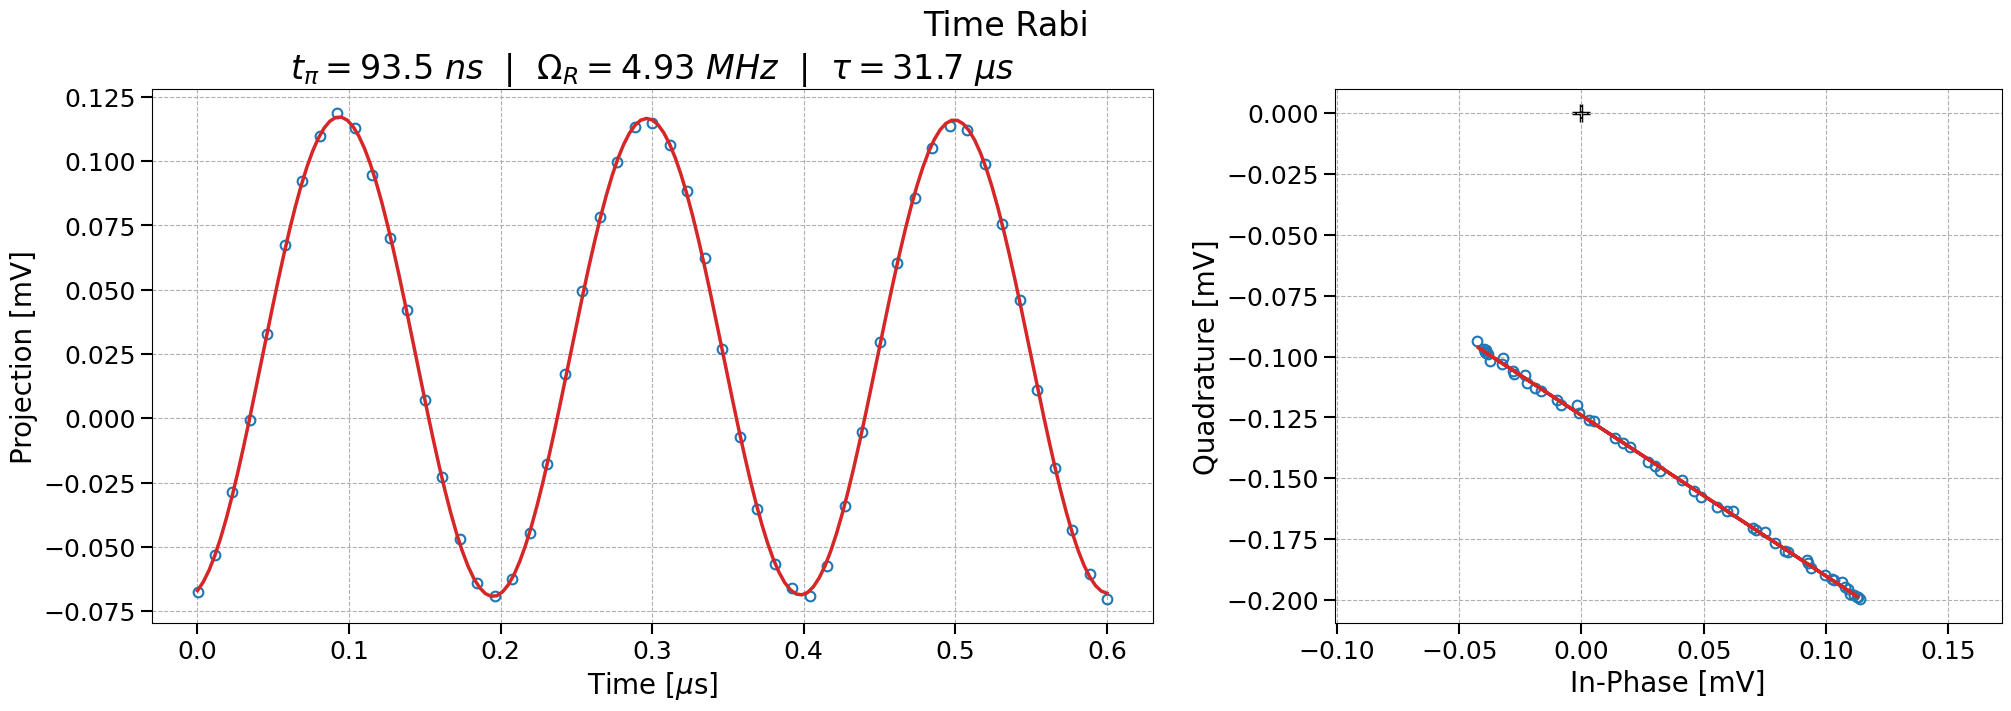

In [ ]:
import numpy as np
from time_rabi import TimeRabi, TimeRabiOptions
from laboneq.dsl.enums import AcquisitionType, AveragingMode
%matplotlib inline

time_rabi = TimeRabi()
options = TimeRabiOptions()
options.count = 2**8
options.acquisition_type = AcquisitionType.SPECTROSCOPY

result = time_rabi.run(
    np.linspace(1e-10,600e-9, 53),
    # sweeps={"readout_range_out": [-30, -20], "readout_amplitude": [0.5, 1]},
    # sweeps={"ro_power": np.linspace(-40, 0, 11)},
    options=options,
)

### Tests

average relative std: 0.45369850227250913
average std: 9.460869266857227e-05
std of the std: 1.3977359178516824e-05
relative std over std avg: 0.14773863568204568


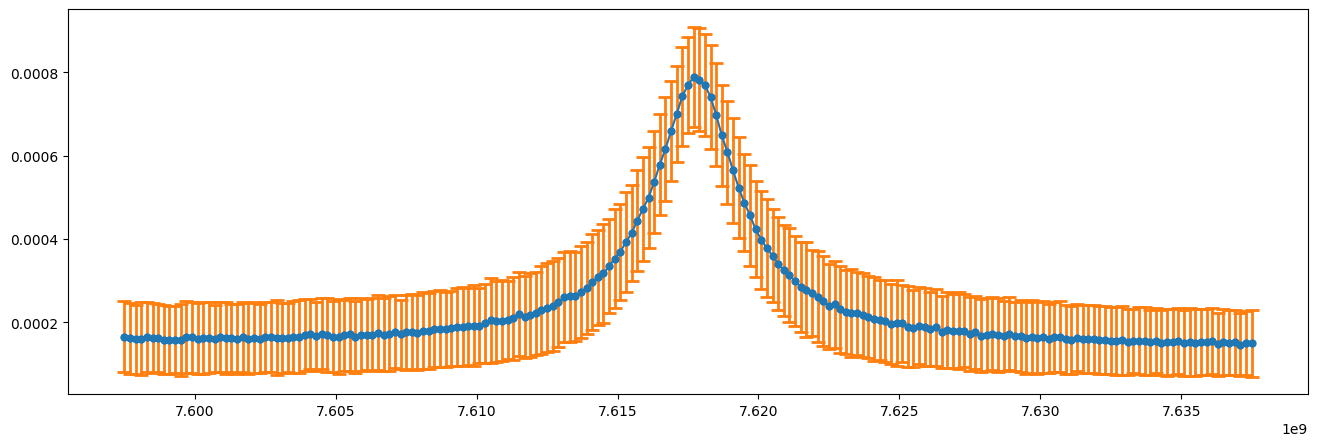

In [ ]:
import sqil_core as sqil
import matplotlib.pyplot as plt

# count = 2600
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00163-rr_spectroscopy_2025-05-14T012721"
# count = 1048
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00158-rr_spectroscopy_2025-05-14T012004"
# count = 200
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00165-rr_spectroscopy_2025-05-14T014453"
# count = 100
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00164-rr_spectroscopy_2025-05-14T012812"
# count = 2
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00159-rr_spectroscopy_2025-05-14T012109"

data, freq, sweep = sqil.extract_h5_data(
    path, ["data", "frequencies", "sweep0"]
)
linmag = np.abs(data[0])
print(
    "average relative std:", np.mean(np.std(linmag, axis=0) / np.mean(linmag, axis=0))
)
print("average std:", np.mean(np.std(linmag, axis=0)))
print("std of the std:", np.std(np.std(linmag, axis=0)))
print(
    "relative std over std avg:",
    np.mean(np.std(np.std(linmag, axis=0)) / np.mean(np.std(linmag, axis=0))),
)

plt.figure(figsize=(16, 5))
plt.errorbar(
    freq[0],
    np.mean(linmag, axis=0),
    np.std(linmag, axis=0),
    fmt="-o",
    color="tab:blue",
    label="Mean with Error",
    ecolor="tab:orange",
    capsize=5,
    capthick=2,
    elinewidth=2,
    markersize=5,
)
plt.show()

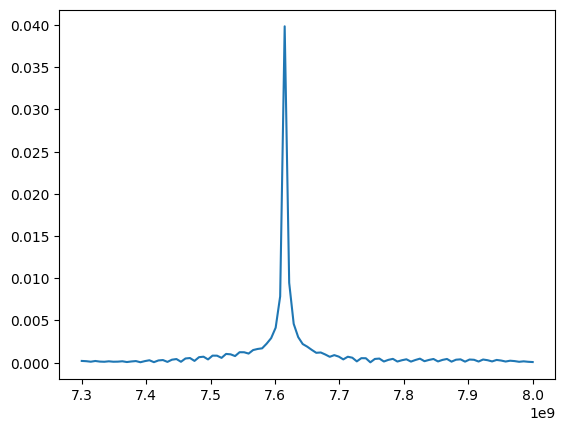

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-12\00011-rr spectroscopy_2025-05-12T231453"

data, freq = sqil.extract_h5_data(path, ["data", "frequencies"])

plt.plot(freq, np.abs(data))
plt.show()

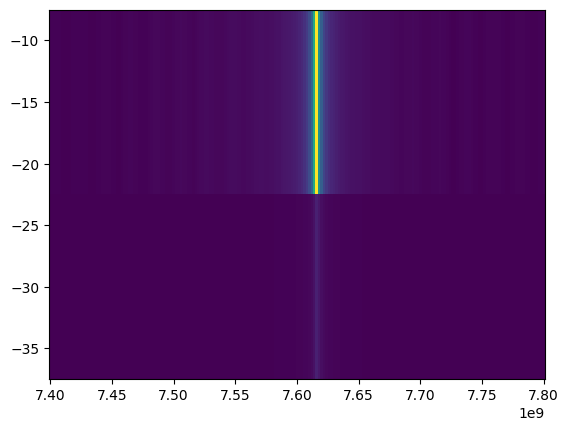

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-13\00029-rr spectroscopy_2025-05-13T005313"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

# for d, f, s in zip(data, freq, sweep):
#     plt.plot(f, np.abs(d), label=s)
# plt.legend()

plt.pcolormesh(freq[0], sweep, np.abs(data))

(201,) (2,) (2, 201)


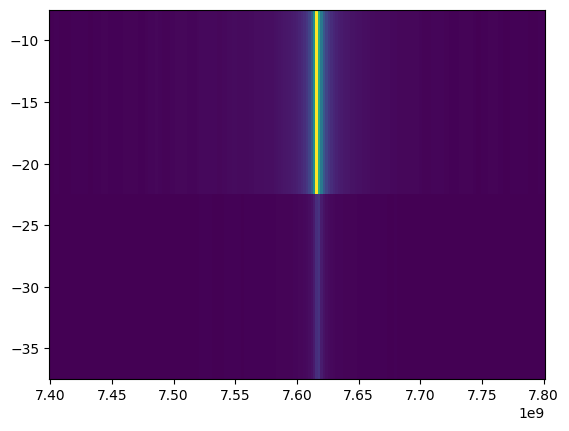

In [ ]:
path = r"Z:\Projects\BottomLoader\data\20250430_Transmon_20250207_multi_Fl_NbAl_N45\2025-05-13\00429-pulsed_onetone_vs_ro_power_2025-05-13T003736"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "ro_freq", "sweep_param"])
plt.pcolormesh(freq[0], sweep, np.abs(data))

print(freq[0].shape, sweep.shape, data.shape)

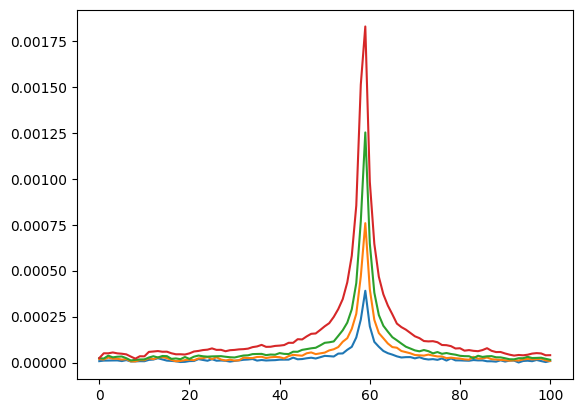

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-13\00126-rr spectroscopy_2025-05-13T222549"

data, freq, sweep0, sweep1 = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0", "sweep1"])

data.shape, freq.shape, sweep0.shape, sweep1.shape

plt.plot(np.abs(data).T)